# Convolutional Neural Networks 🥅

---
## Architechure of a Neural network 🚧
1. **Layer 1** : <mark style="background: #D2B3FFA6;">*conv2D*.</mark> : (For convolutional 2 Dimensional Data like Images , with height and width)
2. **Layer 2** : <mark style="background: #FFB86CA6;">Convolutional Layer</mark> () : Extrach and learn most important features from the target images 
3. **Layer 3** : <mark style="background: #FFF3A3A6;">Hidden Activation (ReLu)</mark> : Adds non linearity to learned features (non straight lines )
4. **Layer 4** : <mark style="background: #BBFABBA6;">Pooling Layer </mark>: Reduce the dimensionality of learned images (*Reduces the calculation the CNN has to make )

		Pooling layer: learns from already learned features , like for a example in a car if the learning feature are , like straight line is a hodd , circular lines are wheels , 
		
5. **Layer 5** : <mark style="background: #21D99A;">Fully Connected Layer (Output Layer)</mark> : Further refines the learned features from the convution layers 
6. **Layer 6** : <mark style="background: #ABF7F7A6;">Output activation </mark>( Adds on non linearities to the output layer )

In [25]:
# Get the data : the data is from Food 101 dataset , which is (101 different classes of food  : but there is a modification , here in this dataset , we are working with only 2 classes , PIZZA and STEAK)
# Inspecting the data ===> the data is in the form of images , so we need to load the images and preprocess them
# Visualizing samples of the data 

In [26]:
import os 
# Walk through the pizze_steak directory and list the number of files 
for dirpath, dirnames , filenames in os.walk("/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak") :
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in the '{dirpath}'")

There are 2 directories and 0 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak'
There are 2 directories and 0 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test'
There are 0 directories and 250 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/steak'
There are 0 directories and 250 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/pizza'
There are 2 directories and 0 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train'
There are 0 directories and 750 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/steak'
There are 0 directories and 750 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/pizza'


In [27]:
# Visualizing the data
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np
import tensorflow as tf

# Set up the directory
data_dir = pathlib.Path("/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from the subdirectories
print(class_names)



['test' 'train']


In [28]:
# Visualizing the sample data

def view_random_image(traget_dir , target_class) :
    # Set up the target directory , (we will view images from here)
    target_folder = traget_dir + target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder) , 1)
    #Read an image and plot it using the matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape : {img.shape}")
    return img

Image shape : (512, 512, 3)


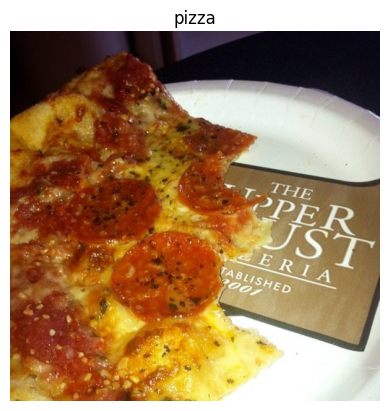

In [29]:
# View thw random image from the pizza directory
img = view_random_image(traget_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/" , target_class = "pizza")

In [30]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 10,   1,   2],
        [ 11,   2,   3],
        [ 12,   3,   4],
        ...,
        [  9,   9,  21],
        [  9,   9,  21],
        [  9,   9,  21]],

       [[ 10,   1,   2],
        [ 11,   2,   3],
        [ 11,   2,   3],
        ...,
        [  8,   8,  20],
        [  8,   8,  20],
        [  8,   8,  20]],

       [[ 10,   1,   2],
        [ 11,   2,   3],
        [ 11,   2,   3],
        ...,
        [  8,   8,  20],
        [  7,   7,  19],
        [  7,   7,  19]],

       ...,

       [[209, 171,  60],
        [208, 170,  61],
        [211, 173,  66],
        ...,
        [224, 234, 226],
        [222, 232, 224],
        [221, 231, 223]],

       [[203, 167,  57],
        [202, 166,  56],
        [203, 166,  59],
        ...,
        [223, 233, 225],
        [222, 232, 224],
        [221, 231, 223]],

       [[197, 163,  53],
        [195, 161,  51],
        [198, 161,  55],
        ...,
        [222, 232, 22

In [31]:
# When we are reading the images they are in the form of a giant array, or tensor , of different pixel values
# The tensor is a representation of 3 color values , RGB , and the values are between 0 and 255 , if the pixel is blue , the value will be 255 , if the pixel is red , the value will be 0 , if the pixel is green , the value will be 0
# View tge image shape # widht , height , color channels (RGB)

img.shape 

(512, 512, 3)

## Image representation 
 > When we are reading the images they are in the form of a giant array, or tensor , of different pixel values

The tensor is a representation of 3 color values , RGB , and the values are between 0 and 255 , if the pixel is blue , the value will be 255 , if the pixel is red , the value will be 0 , if the pixel is green , the value will be 0

View te image shape width , height , color channels (RGB)

### Preprocessing the data

 The data is in the form of images , we need to convert them into tensors , so that we can use them in the model

Scaling the features == > <mark style="background: #21D99A;">NORMALIZATION</mark>

 convert the pixel values between 0 and 1

In [32]:
# Preprocessing the data
# The data is in the form of images , we need to convert them into tensors , so that we can use them in the model   
# Scaling the features  == > NORMALIZATION 
# convert the pixel values between 0 and 1
img / 255.


array([[[0.03921569, 0.00392157, 0.00784314],
        [0.04313725, 0.00784314, 0.01176471],
        [0.04705882, 0.01176471, 0.01568627],
        ...,
        [0.03529412, 0.03529412, 0.08235294],
        [0.03529412, 0.03529412, 0.08235294],
        [0.03529412, 0.03529412, 0.08235294]],

       [[0.03921569, 0.00392157, 0.00784314],
        [0.04313725, 0.00784314, 0.01176471],
        [0.04313725, 0.00784314, 0.01176471],
        ...,
        [0.03137255, 0.03137255, 0.07843137],
        [0.03137255, 0.03137255, 0.07843137],
        [0.03137255, 0.03137255, 0.07843137]],

       [[0.03921569, 0.00392157, 0.00784314],
        [0.04313725, 0.00784314, 0.01176471],
        [0.04313725, 0.00784314, 0.01176471],
        ...,
        [0.03137255, 0.03137255, 0.07843137],
        [0.02745098, 0.02745098, 0.0745098 ],
        [0.02745098, 0.02745098, 0.0745098 ]],

       ...,

       [[0.81960784, 0.67058824, 0.23529412],
        [0.81568627, 0.66666667, 0.23921569],
        [0.82745098, 0

## End to End Model :

- Building a Convolutional Neural network model , to find the <mark style="background: #FFB86CA6;">Patterns</mark> in the images 
	- Load the images
	- Preprocess the images 
	- Build a CNN to find pattern in the images 
	- Compile the CNN
	- Fit the CNN ti the data 


> The imageDataGenerator , will generate the batches of image data ,--> with real time data augmentation

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed

tf.random.set_seed(42)

# Preprocessing the data , get all the pixel values between 0 and 1 , Normalizing 
train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up path to data directories
train_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/"
test_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/"

# Import the data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir , 
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                                class_mode = "binary",
                                                 seed = 42 )


valid_data = valid_datagen.flow_from_directory(directory = test_dir ,
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                               class_mode = "binary",
                                               seed = 42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [34]:
# Build a CNN model , (same as tiny VGG)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size= 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10 , 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding= "valid"),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu"),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = "sigmoid")

])

/Users/akhilkumar/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### In this the len(train_data)  = 47 , that is 1500 classes divided by batch of 32 1500/32 = 47


In [37]:
# Compile the cnn

model_1.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model 

history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 394ms/step - accuracy: 0.8463 - loss: 0.3635 - val_accuracy: 0.8980 - val_loss: 0.2952
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2025-01-23 22:46:58.648192: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-01-23 22:46:58.653991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 440ms/step - accuracy: 0.8955 - loss: 0.2776 - val_accuracy: 0.8660 - val_loss: 0.3283
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2025-01-23 22:47:19.691993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-01-23 22:47:19.698031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.9100 - loss: 0.2444 - val_accuracy: 0.8800 - val_loss: 0.2968


In [38]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)